<a href="https://colab.research.google.com/github/omkarwazulkar/ImbalancedClassificationProjects/blob/main/German_Credit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Dataset/Datasets/german.csv'

In [ ]:
from pandas import read_csv

dataframe = read_csv(path, header = None)
print(dataframe.shape)

(1000, 21)


In [ ]:
from collections import Counter

target = dataframe.values[:, -1]
counter = Counter(target)
for k, v in counter.items():
  per = v / len(target) * 100
  print("Class : %d Count : %d Percentage : %d " % (k, v, per))

Class : 1 Count : 700 Percentage : 70 
Class : 2 Count : 300 Percentage : 30 


In [ ]:
num_col = dataframe.select_dtypes(include = ['int64', 'float64']).columns
subset = dataframe[num_col]

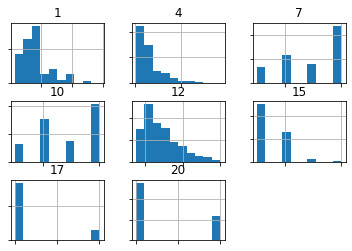

In [ ]:
from matplotlib import pyplot

histo = subset.hist()
for axis in histo.flatten():
  axis.set_xticklabels([])
  axis.set_yticklabels([])
pyplot.show()

In [ ]:
last_col = len(dataframe.columns) - 1
X, y = dataframe.drop(last_col, axis = 1), dataframe[last_col]
print(X, y)

      0   1    2    3     4    5    6   ...    13    14 15    16 17    18    19
0    A11   6  A34  A43  1169  A65  A75  ...  A143  A152  2  A173  1  A192  A201
1    A12  48  A32  A43  5951  A61  A73  ...  A143  A152  1  A173  1  A191  A201
2    A14  12  A34  A46  2096  A61  A74  ...  A143  A152  1  A172  2  A191  A201
3    A11  42  A32  A42  7882  A61  A74  ...  A143  A153  1  A173  2  A191  A201
4    A11  24  A33  A40  4870  A61  A73  ...  A143  A153  2  A173  2  A191  A201
..   ...  ..  ...  ...   ...  ...  ...  ...   ...   ... ..   ... ..   ...   ...
995  A14  12  A32  A42  1736  A61  A74  ...  A143  A152  1  A172  1  A191  A201
996  A11  30  A32  A41  3857  A61  A73  ...  A143  A152  1  A174  1  A192  A201
997  A14  12  A32  A43   804  A61  A75  ...  A143  A152  1  A173  1  A191  A201
998  A11  45  A32  A43  1845  A61  A73  ...  A143  A153  1  A173  1  A192  A201
999  A12  45  A34  A41  4576  A62  A71  ...  A143  A152  1  A173  1  A191  A201

[1000 rows x 20 columns] 0      1
1    

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_ix = X.select_dtypes(include=['object', 'bool']).columns
ct = ColumnTransformer([('o',OneHotEncoder(),cat_ix)], remainder='passthrough')
X = ct.fit_transform(X)

In [ ]:
print(X)

[[ 1.  0.  0. ... 67.  2.  1.]
 [ 0.  1.  0. ... 22.  1.  1.]
 [ 0.  0.  0. ... 49.  1.  2.]
 ...
 [ 0.  0.  0. ... 38.  1.  1.]
 [ 1.  0.  0. ... 23.  1.  1.]
 [ 0.  1.  0. ... 27.  1.  1.]]


In [ ]:
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(y)

In [ ]:
print(y)

[0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1
 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 

In [ ]:
# Combines the above steps in one load_dataset function

def load_dataset(full_path):
  dataframe = read_csv(full_path, header=None)
  last_ix = len(dataframe.columns) - 1
  X, y = dataframe.drop(last_ix, axis=1), dataframe[last_ix]
  cat_ix = X.select_dtypes(include=['object', 'bool']).columns
  ct = ColumnTransformer([('o',OneHotEncoder(),cat_ix)], remainder='passthrough')
  y = LabelEncoder().fit_transform(y)
  return X, y

In [ ]:
from sklearn.metrics import fbeta_score

def f2_measure(y_true, y_pred):
  return fbeta_score(y_true, y_pred, beta = 2)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import make_scorer

def evaluate_model(X, y, model):
  cv =  RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
  metric = make_scorer(f2_measure)
  scores = cross_val_score(model, X, y, scoring = metric, cv = cv, n_jobs = 1)
  return scores

In [ ]:
from sklearn.dummy import DummyClassifier
from numpy import std
from numpy import mean

X, y = load_dataset(path)
print(X.shape, y.shape, Counter(y))
model = DummyClassifier(strategy = 'constant', constant = 1)
scores = evaluate_model(X, y, model)
print("Mean F2 : %.3f (%.3f) " % (mean(scores), std(scores)))

(1000, 20) (1000,) Counter({0: 700, 1: 300})
Mean F2 : 0.682 (0.000) 


In [ ]:
# Models 
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC

def get_models():
  models, names = list(), list()
  # LR
  models.append(LogisticRegression(solver='liblinear'))
  names.append('LR')
  # LDA
  models.append(LinearDiscriminantAnalysis())
  names.append('LDA')
  # NB
  models.append(GaussianNB())
  names.append('NB')
  # GPC
  models.append(GaussianProcessClassifier())
  names.append('GPC')
  # SVM
  models.append(SVC(gamma='scale'))
  names.append('SVM')
  return models, names

In [ ]:
def load_dataset(full_path):
  dataframe = read_csv(full_path, header=None)
  last_ix = len(dataframe.columns) - 1
  X, y = dataframe.drop(last_ix, axis=1), dataframe[last_ix]
  cat_ix = X.select_dtypes(include=['object', 'bool']).columns
  num_ix = X.select_dtypes(include=['int64', 'float64']).columns
  y = LabelEncoder().fit_transform(y)
  return X.values, y, cat_ix, num_ix

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

X, y, cat_ix, num_ix = load_dataset(path)
models, names = get_models()
results = list()

for i in range(len(models)):
  ct = ColumnTransformer([('c',OneHotEncoder(),cat_ix), ('n',MinMaxScaler(),num_ix)])
  pipeline = Pipeline(steps=[('t',ct),('m',models[i])])
  scores = evaluate_model(X, y, pipeline)
  print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

>LR 0.498 (0.072)
>LDA 0.519 (0.072)
>NB 0.639 (0.049)
>GPC 0.219 (0.061)
>SVM 0.436 (0.077)


In [ ]:
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import OneSidedSelection

def get_models():
  models, names = list(), list()
  # TL
  models.append(TomekLinks())
  names.append('TL')
  # ENN
  models.append(EditedNearestNeighbours())
  names.append('ENN')
  # RENN
  models.append(RepeatedEditedNearestNeighbours())
  names.append('RENN')
  # OSS
  models.append(OneSidedSelection())
  names.append('OSS')
  # NCR
  models.append(NeighbourhoodCleaningRule())
  names.append('NCR')
  return models, names

>TL 0.669 (0.057)
>ENN 0.706 (0.048)
>RENN 0.714 (0.041)
>OSS 0.669 (0.056)
>NCR 0.693 (0.052)


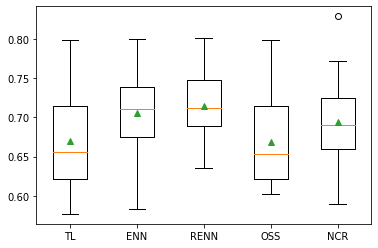

In [ ]:
from imblearn.pipeline import Pipeline

models, names = get_models()
results = list()

for i in range(len(models)):
  model = LogisticRegression(solver='liblinear', class_weight='balanced')
  ct = ColumnTransformer([('c',OneHotEncoder(),cat_ix), ('n',MinMaxScaler(),num_ix)])
  pipeline = Pipeline(steps=[('t',ct), ('s', models[i]), ('m',model)])
  scores = evaluate_model(X, y, pipeline)
  results.append(scores)
  print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))
  # plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
# Finalised Model : RENN

X, y, cat_ix, num_ix = load_dataset(path)
model = LogisticRegression(solver='liblinear', class_weight='balanced')
ct = ColumnTransformer([('c',OneHotEncoder(),cat_ix), ('n',MinMaxScaler(),num_ix)])
pipeline = Pipeline(steps=[('t',ct), ('s', RepeatedEditedNearestNeighbours()), ('m',model)])
pipeline.fit(X, y)

Pipeline(steps=[('t',
                 ColumnTransformer(transformers=[('c', OneHotEncoder(),
                                                  Int64Index([0, 2, 3, 5, 6, 8, 9, 11, 13, 14, 16, 18, 19], dtype='int64')),
                                                 ('n', MinMaxScaler(),
                                                  Int64Index([1, 4, 7, 10, 12, 15, 17], dtype='int64'))])),
                ('s', RepeatedEditedNearestNeighbours()),
                ('m',
                 LogisticRegression(class_weight='balanced',
                                    solver='liblinear'))])

In [ ]:
print('Good Customers:')
data = [['A11', 6, 'A34', 'A43', 1169, 'A65', 'A75', 4, 'A93', 'A101', 4, 'A121', 67,
         'A143', 'A152', 2, 'A173', 1, 'A192', 'A201'],
        ['A14', 12, 'A34', 'A46', 2096, 'A61', 'A74', 2, 'A93', 'A101', 3, 'A121', 49, 'A143',
        'A152', 1, 'A172', 2, 'A191', 'A201'],
        ['A11', 42, 'A32', 'A42', 7882, 'A61', 'A74', 2, 'A93', 'A103', 4, 'A122', 45, 'A143',
        'A153', 1, 'A173', 2, 'A191', 'A201']]
for row in data:
  yhat = pipeline.predict([row])
  label = yhat[0]
  print('>Predicted=%d (expected 0)' % (label))

Good Customers:
>Predicted=0 (expected 0)
>Predicted=0 (expected 0)
>Predicted=1 (expected 0)


In [ ]:
print('Bad Customers:')
data = [['A13', 18, 'A32', 'A43', 2100, 'A61', 'A73', 4, 'A93', 'A102', 2, 'A121', 37,
        'A142', 'A152', 1, 'A173', 1, 'A191', 'A201'],
        ['A11', 24, 'A33', 'A40', 4870, 'A61', 'A73', 3, 'A93', 'A101', 4, 'A124', 53, 'A143',
        'A153', 2, 'A173', 2, 'A191', 'A201'],
        ['A11', 24, 'A32', 'A43', 1282, 'A62', 'A73', 4, 'A92', 'A101', 2, 'A123', 32, 'A143',
        'A152', 1, 'A172', 1, 'A191', 'A201']]
for row in data:
  yhat = pipeline.predict([row])
  label = yhat[0]
  print('>Predicted=%d (expected 1)' % (label))

Bad Customers:
>Predicted=1 (expected 1)
>Predicted=1 (expected 1)
>Predicted=1 (expected 1)
